## Importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Reading Dataset

In [2]:
df = pd.read_csv('Boston.csv')

In [3]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Check Missing Values

In [4]:
df.isna().sum(axis=0)

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

## Data Cleaning

In [5]:
df.drop(columns='Unnamed: 0',inplace=True)

In [6]:
X = df.drop(columns='medv')
y = df['medv']

## Feature Selection


### Check for MultiCollinearity

<AxesSubplot:>

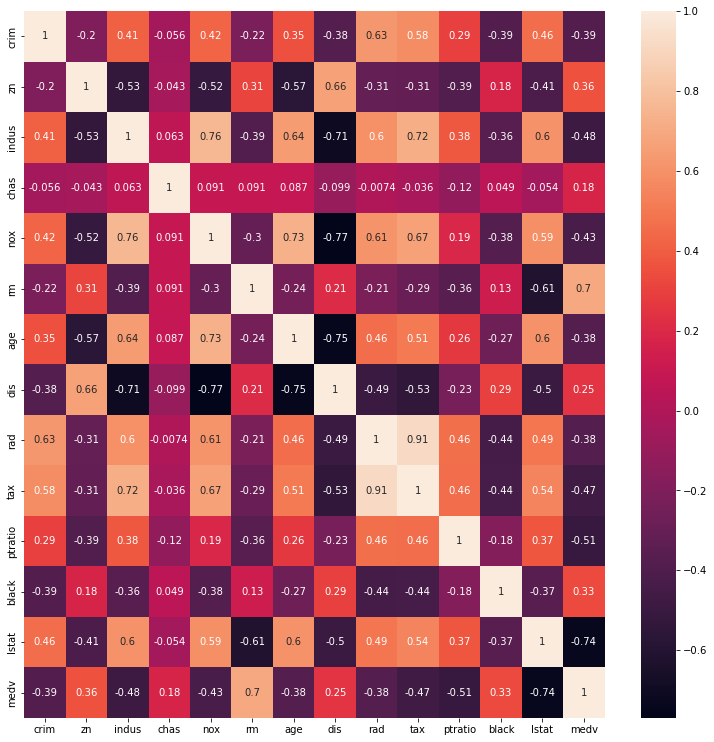

In [8]:
df_corr = df.corr()
fig , ax = plt.subplots(figsize=(13,13))
sns.heatmap(data = df_corr,annot = True)

### Eliminate features with correlation > 0.90 or < -.90

In [9]:
## We Observe 'rad' & 'tax' have a HIGH Co-linearity with one another
## since rad seems to have a better corelation with our dependent feature 'medv'
## keep rad and eliminate 'tax'

X.drop(columns='tax',inplace=True)

### Train-Test Split

In [10]:
from sklearn.model_selection import train_test_split 

## perform a train-test split of 80%/20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Select K-best features

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [12]:
## first of all, since this is regression problem with continuous input and output columns
## select f_regression for 5 features
getFeatures = SelectKBest(score_func=f_regression, k=5)

## fit the training data to this object of SelectKBest
X_new = getFeatures.fit_transform(X_train,y_train)

## X_new right now is a 2D numpy array, we need to get a data frame instead
## To do that, obtain the data feature list 
feature_list = X_train.columns[getFeatures.get_support()]

### Best 5 features are

In [13]:
feature_list

Index(['indus', 'nox', 'rm', 'ptratio', 'lstat'], dtype='object')

### Determining Best 3 featues

In [14]:
## first of all, since this is regression problem with continuous input and output columns
## select f_regression for 5 features
getFeatures_best3 = SelectKBest(score_func=f_regression, k=3)

## fit the training data to this object of SelectKBest
X_new_best3 = getFeatures_best3.fit_transform(X_train,y_train)

## X_new right now is a 2D numpy array, we need to get a data frame instead
## To do that, obtain the data feature list 
feature_list = X_train.columns[getFeatures_best3.get_support()]

## now select the new features
X_train_new_best3 = X_train.loc[:,getFeatures_best3.get_support()]
X_train_new_best3.head()

,rm,ptratio,lstat
42,6.169,17.9,5.81
58,6.145,19.7,6.86
385,5.277,20.2,30.81
78,6.232,18.7,12.34
424,5.565,20.2,17.16


In [15]:
## do it similarly for test features
X_test_new_best3 = X_test.loc[:,getFeatures_best3.get_support()]
X_test_new_best3.head()

,rm,ptratio,lstat
307,6.849,18.4,7.53
343,6.696,17.6,7.18
47,6.030,17.9,18.80
67,5.878,18.9,8.10
362,5.362,20.2,10.19


## Model Training

In [16]:
from sklearn.linear_model import LinearRegression

### Train with 3 Best Features

In [17]:
model_3_best = LinearRegression(normalize=True)
model_3_best.fit(X_train_new_best3,y_train)

LinearRegression(normalize=True)

#### Accuracy is

In [18]:
model_3_best.score(X_test_new_best3,y_test)

0.6959056368091423

### Train with all features

#### Accuracy is

In [19]:
model_all_features = LinearRegression(normalize=True)
model_all_features.fit(X_train,y_train)
model_all_features.score(X_test,y_test)

0.7530242318706895